# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up for loop counter
cities_count = len(cities)

#set up lists 
# initialize various lists
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + "&q=" + city

# header
print("Beginning Data Retreival")
print("-----------------------------")

# loop through all the cities

for x in range(cities_count):
    print(f"Processing Record {x} of Set something | {cities[x]}.")
    params = {"q":cities[x],
                  "units":"imperial",
                "appid":weather_api_key}
    try:      
        response = requests.get(url, params=params)
        response_json = response.json()
    
        # read the json into the various lists
        City.append(response_json['name'])
        Lat.append(response_json['coord']['lat'])
        Lng.append(response_json['coord']['lon'])
        Max_Temp.append(response_json['main']['temp_max'])
        Humidity.append(response_json['main']['humidity'])
        Cloudiness.append(response_json['clouds']['all'])
        Wind_Speed.append(response_json['wind']['speed'])
        Country.append(response_json['sys']['country'])
        Date.append(response_json['dt'])
    except:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retreival
-----------------------------
Processing Record 0 of Set something | puerto ayora.
Processing Record 1 of Set something | victoria.
Processing Record 2 of Set something | teahupoo.
Processing Record 3 of Set something | wulanhaote.
City not found. Skipping...
Processing Record 4 of Set something | kargasok.
Processing Record 5 of Set something | flin flon.
Processing Record 6 of Set something | saskylakh.
Processing Record 7 of Set something | castro.
Processing Record 8 of Set something | taolanaro.
City not found. Skipping...
Processing Record 9 of Set something | lompoc.
Processing Record 10 of Set something | ambodifototra.
City not found. Skipping...
Processing Record 11 of Set something | rungata.
City not found. Skipping...
Processing Record 12 of Set something | khatanga.
Processing Record 13 of Set something | puerto escondido.
Processing Record 14 of Set something | port alfred.
Processing Record 15 of Set something | saint joseph.
Processing Record 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_city = {
    "City": City, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, 
    "Humidity" : Humidity, "Cloudiness": Cloudiness, "Windspeed": Wind_Speed,
    "Country": Country, "Date": Date
}
weather_data = pd.DataFrame(weather_city)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,84.20,54,0,18.41,EC,1610055431
1,Hong Kong,22.2855,114.1577,46.99,74,100,3.00,HK,1610055270
2,Teahupoo,-17.8333,-149.2667,84.20,65,40,2.30,PF,1610055431
3,Kargasok,59.0556,80.8572,-17.46,82,98,5.03,RU,1610055432
4,Flin Flon,54.7682,-101.8650,32.00,69,40,6.91,CA,1610055432


In [6]:
# write data to a csv
weather_data.to_csv('weather_city_file.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#find out how many entries the df contains
len(weather_data)

588

In [8]:
#  Get the indices of cities that have humidity over 100%.

humidity_data = weather_data.loc[weather_data['Humidity'] > 100]

len(humidity_data)

0

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

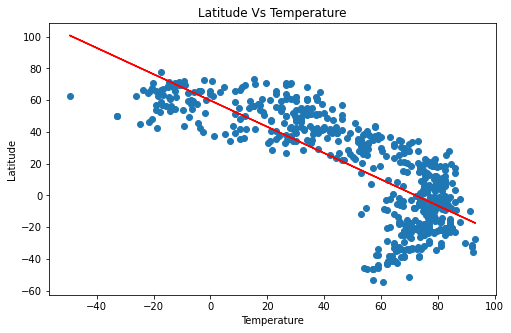

In [21]:
fig, ax1 = plt.subplots(figsize=(8,5))

x_values = weather_data['Max Temp']
y_values = weather_data['Lat']
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Latitude')
ax1.set_title('Latitude Vs Temperature')

plt.scatter(x_values, y_values)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()

fig.savefig("LatvTemp.png")

## Latitude vs. Humidity Plot

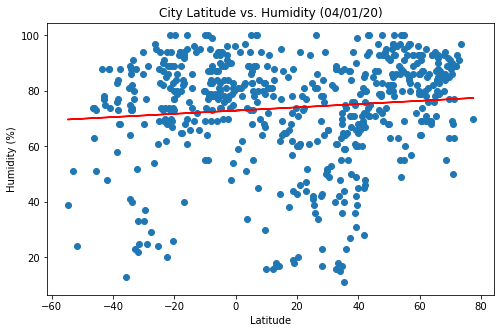

In [22]:
fig, ax2 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Humidity']
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('City Latitude vs. Humidity (04/01/20)')

plt.scatter(x_values, y_values)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()

fig.savefig("LatvHumidity.png")

## Latitude vs. Cloudiness Plot

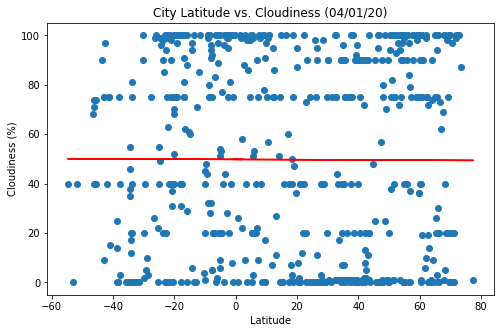

In [23]:
fig, ax3 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness (%)')
ax3.set_title('City Latitude vs. Cloudiness (04/01/20)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("LatvCloudiness.png")

## Latitude vs. Wind Speed Plot

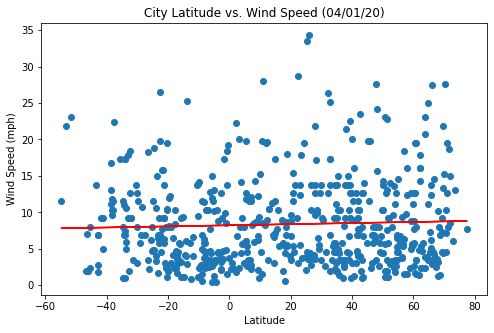

In [24]:
fig, ax4 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Windspeed']
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')
ax4.set_title('City Latitude vs. Wind Speed (04/01/20)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("LatvWind")

## Linear Regression

In [25]:
# Create Data Frames

northern_weather_data = weather_data.loc[weather_data['Lat'] > 0]
southern_weather_data = weather_data.loc[weather_data['Lat'] < 0 ]
len(southern_weather_data)

210

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

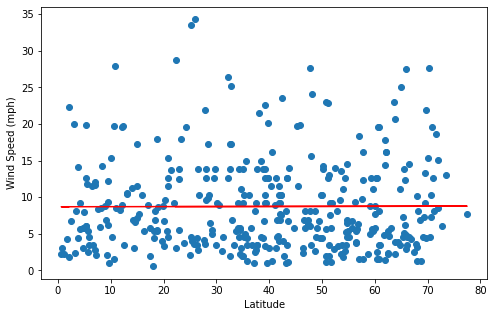

The r-squared is: 1.0623352328460938e-05


In [26]:
fig, ax5 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Windspeed']
ax5.set_xlabel('Latitude')
ax5.set_ylabel('Wind Speed (mph)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("NH_maxtempreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

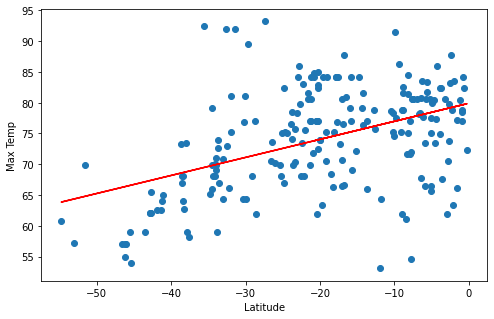

The r-squared is: 0.20797319330053535


In [27]:
fig, ax6 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Max Temp']
ax6.set_xlabel('Latitude')
ax6.set_ylabel('Max Temp')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("SH_maxtempreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

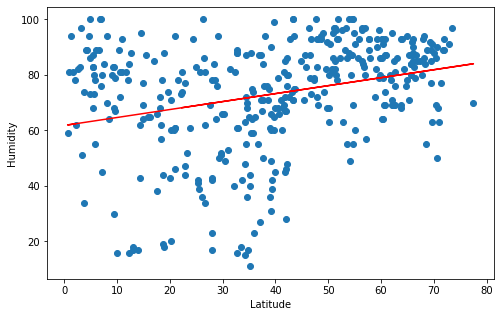

The r-squared is: 0.08438023149655283


In [28]:
fig, ax7 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Humidity']
ax7.set_xlabel('Latitude')
ax7.set_ylabel('Humidity')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("NH_humidityreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

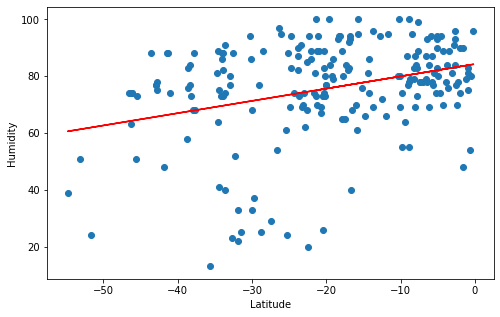

The r-squared is: 0.10364412079762833


In [29]:
fig, ax8 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Humidity']
ax8.set_xlabel('Latitude')
ax8.set_ylabel('Humidity')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("SH_humidityreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

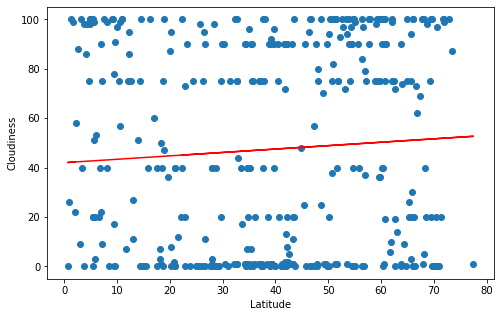

The r-squared is: 0.004567069838103972


In [30]:
fig, ax9 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Cloudiness']
ax9.set_xlabel('Latitude')
ax9.set_ylabel('Cloudiness')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("NH_cloudinessreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

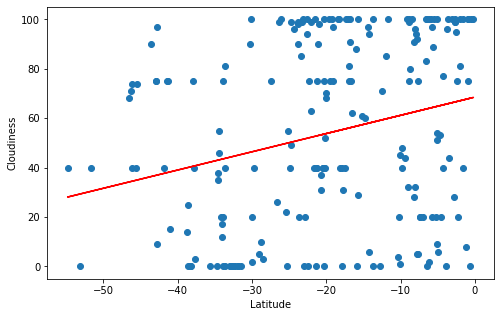

The r-squared is: 0.06721253352932748


In [31]:
fig, ax10 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Cloudiness']
ax10.set_xlabel('Latitude')
ax10.set_ylabel('Cloudiness')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("SH_cloudinessreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

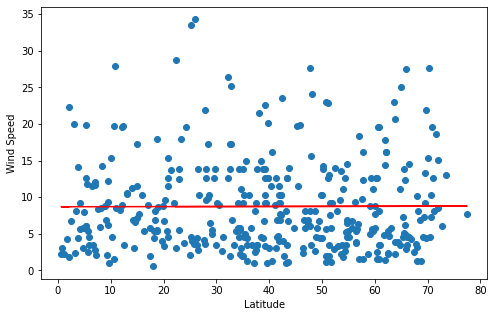

The r-squared is: 1.0623352328460938e-05


In [32]:
fig, ax11 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Windspeed']
ax11.set_xlabel('Latitude')
ax11.set_ylabel('Wind Speed')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("NH_windreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

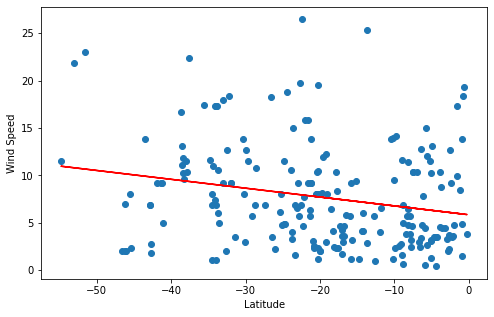

The r-squared is: 0.05251969970442114


In [33]:
fig, ax12 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Windspeed']
ax12.set_xlabel('Latitude')
ax12.set_ylabel('Wind Speed')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("SH_windreg.png")

print(f"The r-squared is: {rvalue**2}")